In [1]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
nutri=pd.read_csv('nutrient.csv',index_col=0)
nutri

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


In [3]:
scaler=StandardScaler()
nutri_scaled=scaler.fit_transform(nutri)

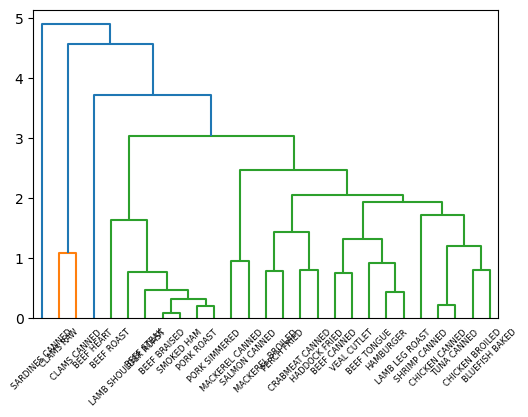

In [4]:
plt.figure(figsize=(6,4))
mergings=linkage(nutri_scaled,method='average')
dendrogram(mergings,labels=list(nutri.index),leaf_rotation=45,leaf_font_size=6)
plt.show()

# Agglomerative clustering

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

In [26]:
clustering=AgglomerativeClustering(n_clusters=3,linkage='average')

In [27]:
pipe=Pipeline([('SCL',scaler),('CLUST',clustering)])

In [28]:
pipe.fit(nutri)

Pipeline(steps=[('SCL', StandardScaler()),
                ('CLUST',
                 AgglomerativeClustering(linkage='average', n_clusters=3))])

In [29]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0])

In [30]:
silhouette_score(nutri_scaled,clustering.labels_)

0.44531853755129397

## AgglomerativeClustering on USArrest data

In [33]:
arrest_df=pd.read_csv('USArrests.csv',index_col=0)

In [34]:
arrest_df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [40]:
clustering=AgglomerativeClustering(n_clusters=2,linkage='average')

In [41]:
arrest_scaled=scaler.fit_transform(arrest_df)

In [42]:
clustering.fit(arrest_scaled)

AgglomerativeClustering(linkage='average')

In [43]:
clustering.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [44]:
silhouette_score(arrest_scaled,clustering.labels_)

0.4084890326217641

In [ ]:
arrest_scaled.